In [197]:
import numpy as np
import matplotlib.pyplot as plt


Each entry in the array is an event corresponding to $p p \to \mu^+\mu^-\; +\; \text{jet}$ or $p p \to \bar\nu\nu\; +\; \text{jet}$. The neutrinos are invisible to the detector, so their momenta are not recorded. The hadronic jet consists of many particles in principle, but their momenta have been added together, so you can think of it as a single object. Each event is a dictionary; the key `jet` gives the four-momentum of the jet; if present, the key `muons` gives the four-momenta of the two muons. The sample contains no background events from other processes.

For events where all produced particles have been detected (i.e., no neutrinos), the momenta transverse to the beam (which is along the $\hat{z}$ direction) are conserved. This means that that sum of $\hat{x}$ and $\hat{y}$ compononets of all the momenta vanishes (to numerical precision of the simulation)

###  Counting Neutrino Flavours from Z Boson Decays

In this section, we count how many events in our dataset correspond to:
- **Visible decays** of the Z boson, where it decays into a pair of muons ($ Z \to \mu^+ \mu^- $),
- **Invisible decays**, where the Z decays into a pair of neutrinos $( Z \to \nu \bar{\nu} $). These neutrinos escape detection, but the associated jet and missing transverse energy (MET) let us infer their presence.

####  Theory

The Z boson in the Standard Model can decay into all fermion-antifermion pairs. Among these:
- Decays into **charged leptons** (like muons) are **visible**,
- Decays into **neutrinos** are **invisible**.

Since neutrinos do not interact in the detector, their presence is inferred from a momentum imbalance — i.e., MET.

Each neutrino flavour contributes equally to the invisible decay width of the Z boson. If there are $ N_\nu $ neutrino flavours, then:

$$
\frac{\Gamma(Z \to \nu \bar{\nu})}{\Gamma(Z \to \mu^+ \mu^-)} \approx 2 \times N_\nu
$$

Thus, by taking the ratio of invisible to visible events \( R \), we estimate:

$$
N_\nu = \frac{R}{2}
$$

---

####  Code Explanation

The code below loops through the dataset and classifies each event:
- If the event contains muons, it's counted as a visible Z decay.
- If not, it's treated as an invisible decay (Z → neutrinos).

In [198]:
#Load our universe
our_sample_data = np.load("./sm_sample.npz",allow_pickle=True)['arr_0']
# Count events with muons and without
n_visible = 0
n_invisible = 0

for event in our_sample_data:
    if 'muons' in event:
        n_visible += 1
    else:
        n_invisible += 1

# Estimate the number of neutrino flavours
our_ratio = n_invisible / n_visible
our_N_nu = our_ratio / (2)
print(f"Visible (muons) events: {n_visible}")
print(f"Invisible (neutrino) events: {n_invisible}")
print(f"ratio: {our_ratio:.2f}")

print(f"Estimated number of neutrino species: {our_N_nu:.3f}")

Visible (muons) events: 15807
Invisible (neutrino) events: 84193
ratio: 5.33
Estimated number of neutrino species: 2.663


In [199]:
#Load another universe
another_universe_sample_data = np.load("./bsm_sample.npz",allow_pickle=True)['arr_0']
# Count events with muons and without
n_visible = 0
n_invisible = 0

for event in another_universe_sample_data:
    if 'muons' in event:
        n_visible += 1
    else:
        n_invisible += 1

# Estimate the number of neutrino flavours
ratio = n_invisible / n_visible
N_nu = ratio / 2
print(f"Visible (muons) events: {n_visible}")
print(f"Invisible (neutrino) events: {n_invisible}")
print(f"ratio: {ratio:.2f}")

print(f"Estimated number of neutrino species in another universe: {N_nu:.3f}")

Visible (muons) events: 12335
Invisible (neutrino) events: 87665
ratio: 7.11
Estimated number of neutrino species in another universe: 3.554


## Analyzing Missing Transverse Energy (MET) in Invisible Events

In this section, we focus on calculating and visualizing the missing transverse energy (MET) for events where the \(Z\) boson decays into neutrinos. These invisible events are characterized by missing energy in the transverse plane, as neutrinos do not interact with the detector.

### Code Explanation

1. **MET Calculation Function:**

   The `compute_met` function calculates the missing transverse energy for a given event. It utilizes the transverse momentum components \(p_x\) and \(p_y\) of the jet:

   ```python
   def compute_met(event):
       px, py = event['jet'][1], event['jet'][2]
       return np.sqrt(px**2 + py**2)
   ```
$p_x$and p_y$  are extracted from the jet four-momentum. The METis then computed as the magnitude of the transverse momentum vector.

Then we classify the events by segregating the dataset into visible and invisible events based on the presence of muons:
```python
visible_events = [event for event in sample_data if 'muons' in event]
invisible_events = [event for event in sample_data if 'muons' not in event]```
```
Next we apply the `compute_met` function to the invisible events to obtain the MET values and plot the MET values. 

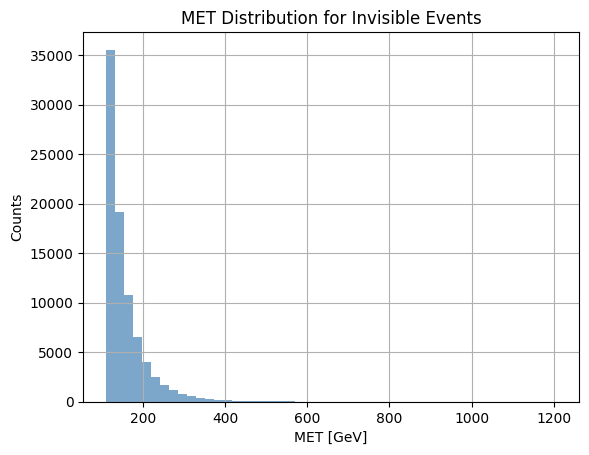

In [200]:
# our universe
def compute_met(event):
    px, py = event['jet'][1], event['jet'][2]
    return np.sqrt(px**2 + py**2)

our_visible_events = [event for event in our_sample_data if 'muons' in event]
our_invisible_events = [event for event in our_sample_data if 'muons' not in event]

met_vals = [compute_met(event) for event in our_invisible_events]

plt.hist(met_vals, bins=50, color='steelblue', alpha=0.7)
plt.title("MET Distribution for Invisible Events")
plt.xlabel("MET [GeV]")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

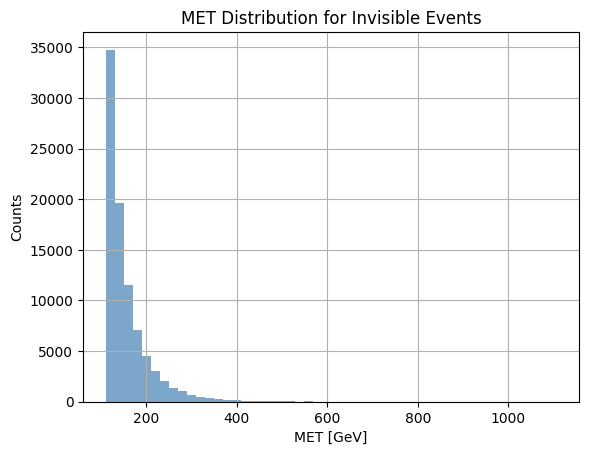

In [201]:
# another universe
another_universe_visible_events = [event for event in another_universe_sample_data if 'muons' in event]
another_universe_invisible_events = [event for event in another_universe_sample_data if 'muons' not in event]

met_vals = [compute_met(event) for event in another_universe_invisible_events]

plt.hist(met_vals, bins=50, color='steelblue', alpha=0.7)
plt.title("MET Distribution for Invisible Events")
plt.xlabel("MET [GeV]")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

## Analyzing Invariant Mass of Muon Pairs

In this section, we calculate and visualize the invariant mass of muon pairs from visible events. This analysis allows us to examine the mass distribution of the muon pairs, which should show a peak around the \(Z\) boson mass if the events predominantly arise from \(Z \to \mu^+ \mu^-\) decays.

We just add the four-vectors of the two muons and compute the invariant mass using the formula: $$ m = \sqrt{E^2 - p_x^2 - p_y^2 - p_z^2} $$

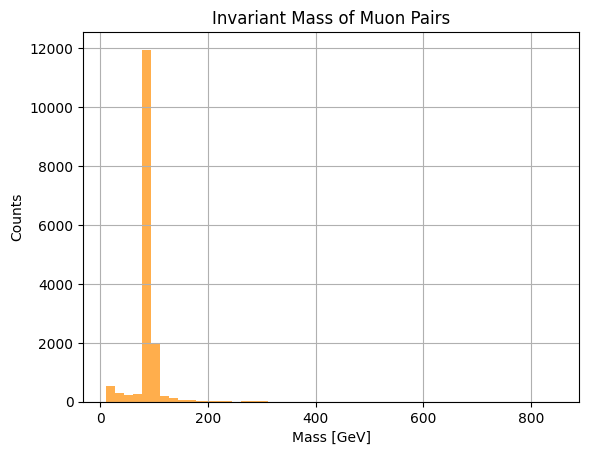

In [202]:
def compute_invariant_mass(muons):
    total = muons[0] + muons[1]
    E, px, py, pz = total
    return np.sqrt(E**2 - px**2 - py**2 - pz**2)

m_mumu = [compute_invariant_mass(event['muons']) for event in our_visible_events]

plt.hist(m_mumu, bins=50, color='darkorange', alpha=0.7)
plt.title("Invariant Mass of Muon Pairs")
plt.xlabel("Mass [GeV]")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

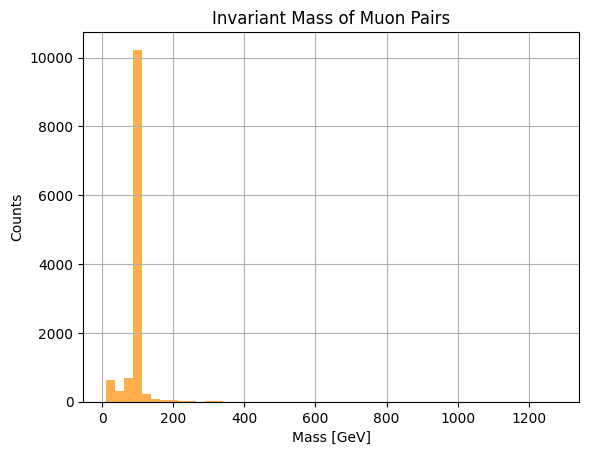

In [203]:
def compute_invariant_mass(muons):
    total = muons[0] + muons[1]
    E, px, py, pz = total
    return np.sqrt(E**2 - px**2 - py**2 - pz**2)

m_mumu = [compute_invariant_mass(event['muons']) for event in another_universe_visible_events]

plt.hist(m_mumu, bins=50, color='darkorange', alpha=0.7)
plt.title("Invariant Mass of Muon Pairs")
plt.xlabel("Mass [GeV]")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

# Kinematic Cuts

In [204]:
#reload our universe
our_sample_data = np.load("sm_sample.npz", allow_pickle=True)['arr_0']
# reload the simulated sample
another_universe_sample_data = np.load("bsm_sample.npz", allow_pickle=True)['arr_0']

## Kinematic Analysis: Selecting Events and Estimating Neutrino Flavours

In this section, we apply kinematic cuts to our dataset to select high-quality events that likely correspond to the processes $Z \to \mu^+ \mu^-$ and calculate the estimated number of neutrino flavours.

### Functions for Kinematic Calculations

To aid in the analysis, we define functions for calculating important kinematic quantities:

1. **Transverse Momentum (\(p_T\)):**

   The `pT` function calculates the transverse momentum of a particle from its four-momentum components:



2. **Pseudorapidity ($eta$):**

   The `eta` function computes the pseudorapidity, which measures the angle of a particle relative to the beam:



3. **Invariant Mass:**

   The `invariant_mass` function calculates the invariant mass of two four-vectors:


### Event Selection with Kinematic Cuts

We apply kinematic cuts designed to select clean events with two well-measured muons likely originating from \(Z\) boson decays:


- **Transverse Momentum Cut:** Ensures both muons are energetic, with \(p_T > 20 \, \text{GeV}\).
- **Pseudorapidity Cut:** Confines muons within the detector's effective range (\(|\eta| < 2.5\)).
- **Invariant Mass Cut:** Selects events where the muon pair's mass is within the \(Z\) boson peak (80-100 GeV).

### Estimating Neutrino Flavours

Using the selected events, we estimate the number of neutrino species by calculating the ratio \(R\) of invisible to visible events


- **Calculate \(R\):** The ratio of invisible (neutrino-related) to visible (muon-related) events.
- **Estimate \(N_\nu\):** Given by \(R/2\), leveraging known branching ratios to infer the number of neutrino species.



In [205]:
def pT(four_vector):
    """Calculate transverse momentum."""
    return np.sqrt(four_vector[1]**2 + four_vector[2]**2)

def eta(four_vector):
    """Calculate pseudorapidity from momentum components."""
    px, py, pz = four_vector[1], four_vector[2], four_vector[3]
    p = np.sqrt(px**2 + py**2 + pz**2)
    theta = np.arccos(pz / p) if p != 0 else 0
    return -np.log(np.tan(theta / 2)) if np.tan(theta / 2) != 0 else 0

def invariant_mass(p1, p2):
    """Calculate invariant mass of two 4-vectors."""
    return np.sqrt((p1[0] + p2[0])**2 - np.sum((p1[1:] + p2[1:])**2))

def calculate_met(event):
    """
    Calculate the missing transverse energy (MET) for an event.
    
    Parameters:
    event (dict): A dictionary containing particles like jets and their four-vectors.
                  Each jet's four-vector is expected to be a list or array
                  of the form [E, px, py, pz].
    
    Returns:
    float: The MET value for the event.
    """
    # Initialize the total transverse momentum sums
    total_px = 0.0
    total_py = 0.0
    
    # For an event containing 'jets' as a key with lists of four-vectors
    for jet in event.get('jets', []):
        px, py = jet[1], jet[2]
        total_px += px
        total_py += py

    for lepton in event.get('muons', []):
        px, py = lepton[1], lepton[2]
        total_px += px
        total_py += py
    
    # Calculate MET as the magnitude of the transverse momentum imbalance
    met = np.sqrt(total_px**2 + total_py**2)
    return met

In [206]:
# our universe
our_selected_events = []

for event in our_sample_data:
    if 'muons' not in event:
        continue

    muons = event['muons']
    if len(muons) != 2:
        continue  # Require two muons

    # Kinematic cuts
    #if not all(pT(mu) > 20 for mu in muons):
     #  continue  # Both muons must have pT > 20 GeV
    #if not all(abs(eta(mu)) < 2.5 for mu in muons):
        #continue  # Within detector acceptance

    met = calculate_met(event)  # Retrieve or calculate MET for the event
    if met <= 30:
        continue  # Ignore events with MET less than or equal to 30 GeV
    
    # Invariant mass cut around Z peak
    mass = invariant_mass(muons[0], muons[1])
    if not (80 < mass < 100):
        continue

    our_selected_events.append(event)


In [207]:
our_n_visible = len(our_selected_events)
our_n_invisible = sum(1 for event in our_sample_data if 'muons' not in event)

our_R = our_n_invisible / (our_n_visible+1)
our_N_nu = our_R / 2

print(f"Selected visible (Z → μμ) events: {our_n_visible}")
print(f"Invisible (Z → νν) events: {our_n_invisible}")
print(f"Ratio R = {our_R:.2f}")
print(f"Estimated number of neutrino flavours in our universe: Nν = {our_N_nu:.2f}")


Selected visible (Z → μμ) events: 13371
Invisible (Z → νν) events: 84193
Ratio R = 6.30
Estimated number of neutrino flavours in our universe: Nν = 3.15


In [208]:
another_universe_selected_events = []

for event in another_universe_sample_data:
    if 'muons' not in event:
        continue

    muons = event['muons']
    if len(muons) != 2:
        continue  # Require two muons

    # Kinematic cuts
   # if not all(pT(mu) > 20 for mu in muons):
     #   continue  # Both muons must have pT > 20 GeV
   # if not all(abs(eta(mu)) < 2.5 for mu in muons):
     #   continue  # Within detector acceptance

    # Invariant mass cut around Z peak
    mass = invariant_mass(muons[0], muons[1])
    if not (80 < mass < 100):
        continue

    another_universe_selected_events.append(event)


In [209]:
another_universe_n_visible = len(another_universe_selected_events)
another_universe_n_invisible = sum(1 for event in another_universe_sample_data if 'muons' not in event)

another_universe_R = another_universe_n_invisible / another_universe_n_visible
another_universe_N_nu = another_universe_R / 2

print(f"Selected visible (Z → μμ) events: {another_universe_n_visible}")
print(f"Invisible (Z → νν) events: {another_universe_n_invisible}")
print(f"Ratio R = {another_universe_R:.2f}")
print(f"Estimated number of neutrino flavours in another universe: Nν = {another_universe_N_nu:.2f}")


Selected visible (Z → μμ) events: 10300
Invisible (Z → νν) events: 87665
Ratio R = 8.51
Estimated number of neutrino flavours in another universe: Nν = 4.26


# Validation
## Invariant Mass Distribution of Muon Pairs

This analysis focuses on visualizing the invariant mass distribution of muon pairs to validate the presence of the \(Z\) boson.

### Code Explanation

1. Invariant Mass Calculation:

   We calculate the invariant mass for events with two muons:

   ```python
   masses = [invariant_mass(event['muons'][0], event['muons'][1])
             for event in sample_data if 'muons' in event and len(event['muons']) == 2]
    ```
2. Next we just plot the histogram of our invariant masses and compare it to the Z boson mass.

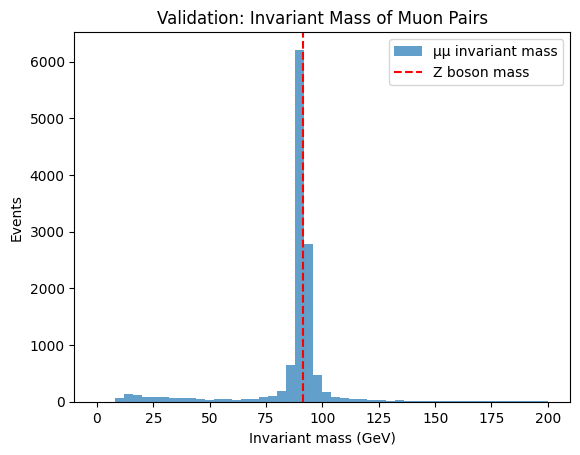

In [210]:
import matplotlib.pyplot as plt

masses = [invariant_mass(event['muons'][0], event['muons'][1])
          for event in another_universe_sample_data if 'muons' in event and len(event['muons']) == 2]

plt.hist(masses, bins=50, range=(0, 200), alpha=0.7, label="μμ invariant mass")
plt.axvline(91.2, color='red', linestyle='--', label='Z boson mass')
plt.xlabel("Invariant mass (GeV)")
plt.ylabel("Events")
plt.legend()
plt.title("Validation: Invariant Mass of Muon Pairs")
plt.show()


## Missing Transverse Energy (MET) Distribution
Next, we analyze the MET for events to distinguish between those containing muons and those likely containing undetected neutrinos.

## Code Explanation
1. MET Calculation:
We compute MET for each event, separating events with and without muons
2. Histogram of MET:
We visualize the distribution of MET for both categories
- The log scale helps discern patterns across a wide range of event counts.


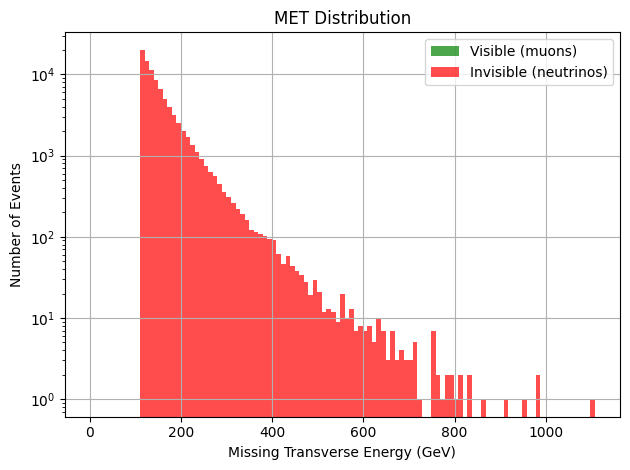

In [211]:
# Arrays to store MET values
met_visible = []   # MET for events with muons (should be near zero)
met_invisible = [] # MET for events without muons (from neutrinos)

# Loop through all events
for event in another_universe_sample_data:
    jet = event['jet']
    px_total = jet[1]
    py_total = jet[2]

    if 'muons' in event:
        for muon in event['muons']:
            px_total += muon[1]
            py_total += muon[2]
        met = np.sqrt(px_total**2 + py_total**2)
        met_visible.append(met)
    else:
        # No muons, missing transverse momentum = jet px, py
        met = np.sqrt(px_total**2 + py_total**2)
        met_invisible.append(met)

# Plot histograms
plt.hist(met_visible, bins=100, alpha=0.7, label='Visible (muons)', color='green')
plt.hist(met_invisible, bins=100, alpha=0.7, label='Invisible (neutrinos)', color='red')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('MET Distribution')
plt.legend()
plt.yscale('log')  # Optional: use log scale to see low counts
plt.grid(True)
plt.tight_layout()
plt.show()

## Cross validation


## Code Summary: Z Boson Analysis

**Steps:**

1.  **Data Input:** Load collider event data (`sample_data`).
2.  **MET Calculation (Initial):** Calculate Missing Transverse Energy (MET) for all events.
3.  **Event Selection:**
    * Require exactly two muons per event.
    * Apply kinematic cuts:
        * `pT(mu) > 20 GeV` (muon transverse momentum).
        * `|eta(mu)| < 2.5` (muon pseudorapidity).
    * Apply invariant mass cut: `80 < m(mu+mu-) < 100 GeV` (Z boson mass window).
4.  **MET Calculation (Final):** Calculate MET for events passing all cuts.
5.  **pT Imbalance:** Calculate transverse momentum imbalance for selected events.
6.  **Plotting:**
    * Histograms of MET before and after cuts.
    * Histogram of pT imbalance in selected events.

**Physics Concepts and Theories Applied:**

* **Z Boson Decay (Z → μ⁺μ⁻):**
    * The Z boson is a neutral weak force carrier that decays into a muon-antimuon pair.
    * The invariant mass of the muon pair should peak around the Z boson mass (~91 GeV).
* **Transverse Momentum (pT):**
    * Momentum component perpendicular to the beam axis.
    * Used to select high-energy muons.
* **Pseudorapidity (eta):**
    * Related to the angle of a particle relative to the beam axis.
    * Used to select central muons.
* **Invariant Mass (m):**
    * Calculated from the four-momenta of the muons:
        * `m² = (E₁ + E₂)² - (p₁ + p₂)²`
        * Where E is energy, and p is momentum.
    * Used to identify Z boson decays.
* **Missing Transverse Energy (MET):**
    * Imbalance of transverse momentum in the detector.
    * Indicates undetected particles (e.g., neutrinos) or mismeasurements.
    * Used to study Z → νν̄ decays (background) and detector performance.
* **Transverse Momentum Imbalance:**
    * The vector sum of all transverse momentum from the visible particles in the event.
    * A measure of the balance of the visible particles.
* **Breit-Wigner Distribution:**
    * The shape of the Z boson mass peak.
    * Describes the resonance of unstable particles.

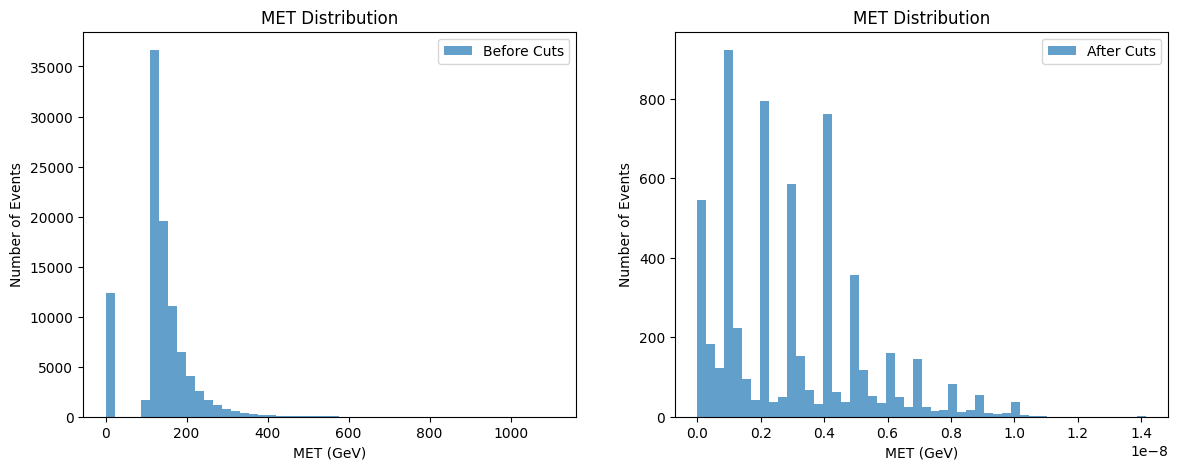

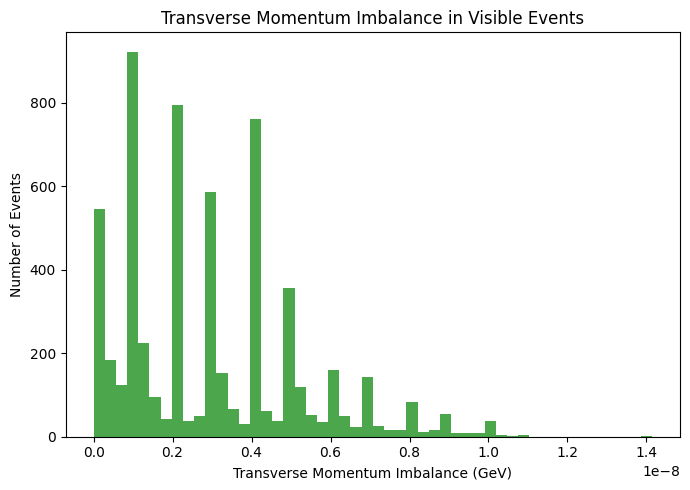

In [212]:
def pT(four_vector):
    return np.sqrt(four_vector[1]**2 + four_vector[2]**2)

def calc_MET(event):
    """ Calculate MET: total imbalance in the transverse plane """
    px, py = 0, 0
    px += event['jet'][1]
    py += event['jet'][2]
    if 'muons' in event:
        for muon in event['muons']:
            px += muon[1]
            py += muon[2]
    return np.sqrt(px**2 + py**2)

def transverse_momentum_imbalance(event):
    """ Calculate the imbalance in transverse momentum """
    px, py = 0, 0
    px += event['jet'][1]
    py += event['jet'][2]
    for muon in event['muons']:
        px += muon[1]
        py += muon[2]
    return np.sqrt(px**2 + py**2)

# Collect MET data before and after cuts
MET_before_cut = []
MET_after_cut = []

# Collect transverse momentum balance values.
pT_balance = []

# Iterate over the events
for event in another_universe_sample_data:
    MET_before_cut.append(calc_MET(event))
    
    if 'muons' not in event or len(event['muons']) != 2:
        continue
    
    muons = event['muons']
    if not all(pT(mu) > 20 for mu in muons) or not all(abs(eta(mu)) < 2.5 for mu in muons):
        continue

    mass = invariant_mass(muons[0], muons[1])
    if not (80 < mass < 100):
        continue
    
    MET_after_cut.append(calc_MET(event))
    pT_balance.append(transverse_momentum_imbalance(event))

# Plot MET before and after cuts
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(MET_before_cut, bins=50, alpha=0.7, label='Before Cuts')
plt.xlabel('MET (GeV)')
plt.ylabel('Number of Events')
plt.title('MET Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(MET_after_cut, bins=50, alpha=0.7, label='After Cuts')
plt.xlabel('MET (GeV)')
plt.ylabel('Number of Events')
plt.title('MET Distribution')
plt.legend()

# Plot the transverse momentum imbalance in visible events
plt.figure(figsize=(7, 5))
plt.hist(pT_balance, bins=50, alpha=0.7, color='g')
plt.xlabel('Transverse Momentum Imbalance (GeV)')
plt.ylabel('Number of Events')
plt.title('Transverse Momentum Imbalance in Visible Events')

plt.tight_layout()
plt.show()
